<html id="* graph_euler_method">
	<author>Hiroshi TAKEMOTO</author>
	(<email>take.pwave@gmail.com</email>)
	
	<h1>Sageでグラフを再現してみよう：データ解析のための統計モデリング入門第7章</h1>
	<p>
		この企画は、雑誌や教科書にでているグラフをSageで再現し、
		グラフの意味を理解すると共にSageの使い方をマスターすることを目的としています。
	</p>
	<p>
		前回に続き、<a href="http://www.amazon.co.jp/dp/400006973X/">データ解析のための統計モデリング入門</a>
		（以下、久保本と書きます）
		の第7章の例題をSageを使って再現してみます。
	</p>
	<p>
		久保本もようやくテーマの個体差が大きい場合の例題に入りました。今回のグラフは図7.10です。以下に久保本から引用します。
	</p>
		<img src="images/Fig7.10.png"/>
	<p>
		数式処理システムSageのノートブックは、計算結果を表示するだけではなく、実際に動かすことができるのが大きな特徴です。
		この機会にSageを分析に活用してみてはいかがでしょう。
	</p>
</html>

<html>
	<h2>前準備</h2>
	<p>
		最初に必要なライブラリーやパッケージをロードしておきます。
	</p>
</html>

In [1]:
# RとPandasのデータフレームを相互に変換する関数を読み込む
# Rの必要なライブラリ
r('library(ggplot2)')
r('library(jsonlite)')

# python用のパッケージ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
# statsmodelsを使ってglmを計算します
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats.stats import pearsonr
%matplotlib inline

# jupyter用のdisplayメソッド
from IPython.display import display, Latex, HTML, Math, JSON
# sageユーティリティ
load('script/sage_util.py')
# Rユーティリティ
load('script/RUtil.py')

<html>
	<h2>個体差の大きなデータ</h2>
	<p>
		７章の例題は、個体$x_i$で観測された以下のデータを含みます。
		<ul>
			<li>調査種子数$N_i = 8$</li>
			<li>生存種子数$y_i$</li>
			<li>葉数$x_i$</li>
			<li>個体識別番号id</li>
		</ul>
	</p>
</html>

<html>
	<h3>データの特徴と可視化</h3>
	<p>
		いつもの通りデータを読み込み、その内容、統計情報をチェックします。
	</p>
</html>

In [2]:
# 7章のデータを読み込む
d = pd.read_csv('data/ch7_data.csv')
d.head()

,N,y,x,id
0,8,0,2,1
1,8,1,2,2
2,8,2,2,3
3,8,4,2,4
4,8,1,2,5


In [3]:
d.describe()

,N,y,x,id
count,100.0,100.000000,100.000000,100.000000
mean,8.0,3.810000,4.000000,50.500000
std,0.0,3.070534,1.421338,29.011492
min,8.0,0.000000,2.000000,1.000000
25%,8.0,1.000000,3.000000,25.750000
50%,8.0,3.000000,4.000000,50.500000
75%,8.0,7.000000,5.000000,75.250000
max,8.0,8.000000,6.000000,100.000000


<html>
	<h3>同じ点に重なるデータの可視化</h3>
	<p>
		プロットデータを見ると、とても１００個のデータがあるようには見えません。
		これは、種子数・葉数が整数で同じ点に複数のデータが重なっているからです。
	</p>
</html>

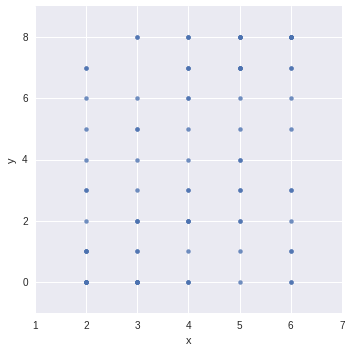

In [4]:
sns.lmplot('x', 'y', data=d,  fit_reg=False)
plt.show()

lmplotのx_jitter, y_jitterに揺れ（jitter)の量をセットすると、重なっている点がずれてプロットされます。

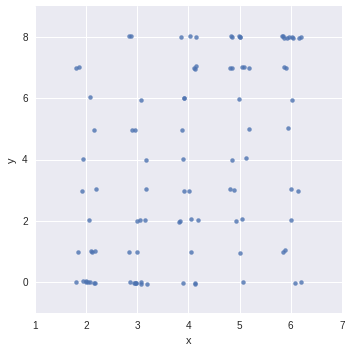

In [5]:
# jitterを使って同じポイントに重ならないようにする
sns.lmplot('x', 'y', data=d,  fit_reg=False, x_jitter=0.2, y_jitter=0.05 )
plt.show()

<html>
	<h3>GLMを使った分析</h3>
	<p>
		このデータを６章と同じようにGLMで分析してみます。
		予測値は直線となっており、６章のようなロジスティック曲線にはなっていません。
	</p>
</html>

In [6]:
# Rにdを渡す
PandaDf2RDf(d, "d")

In [7]:
# 通常のGLMを使って解析
r('fit <- glm(cbind(y, N - y) ~ x , data=d, family=binomial)')
r('summary(fit)')


Call:
glm(formula = cbind(y, N - y) ~ x, family = binomial, data = d)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.4736  -2.1182  -0.5505   2.3097   4.0966  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.1487     0.2372  -9.057   <2e-16 ***
x             0.5104     0.0556   9.179   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 607.42  on 99  degrees of freedom
Residual deviance: 513.84  on 98  degrees of freedom
AIC: 649.61

Number of Fisher Scoring iterations: 4


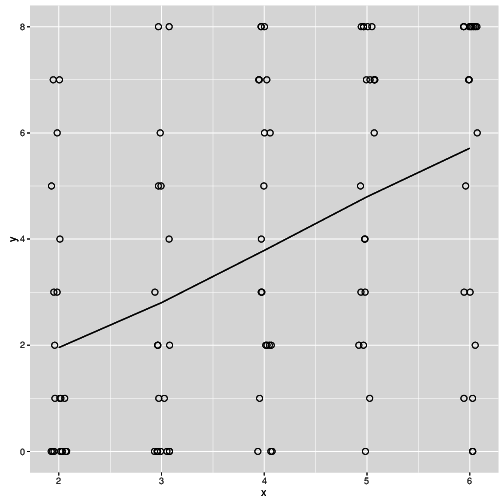

In [8]:
graph = preGraph("images/fig7.3-R.pdf")
r('p <- ggplot(d, aes(x=x, y=y) )+ geom_point(position=position_jitter(width=.2, height=0), shape=21, size=2.5) + geom_line(aes(x=x, y=8*fit$fitted.values))')
r('plot(p)')
postGraph(graph)

<html>
	<p>
		久保本に従い、$x_i = 4$のデータを抽出し、そのヒストグラムとGLMから推定された
		二項分布を表示してみましょう。
	</p>
	<p>
		以下の様にPandasの抽出機能を使ってx=4のデータを取り出し、頻度を求めます。
		これにロジスティック_logisticと二項分布_pの２つの関数を定義します。
	</p>
</html>

In [9]:
tbl4 = d[d.x==4].groupby('y').size()
tbl4_lst = zip(tbl4.index, tbl4.tolist())
print tbl4

y
0    3
1    1
2    4
3    2
4    1
5    1
6    2
7    3
8    3
dtype: int64


In [10]:
# ロジスティック関数の定義
def _logistic(z):
    return 1/(1 + exp(-z))

In [11]:
# 二項分布を定義
def _p(q, y, N):
    return binomial(N, y)*q^y*(1-q)^(N-y)

<html>
	<p>
		GLMで求まったモデルを使って、x=4でのqの値をロジスティック関数から求めます。
	</p>
	<p>
		x=4での種子数分布（青点）と推定された二項分布（_p関数の値）にデータ数（tbl4.sum()=20）を掛けた値が、
		推定された種子数になります。
	</p>
	<p>
		このグラフからは、推定された種子数は、観測された種子数を説明しているように思えません。
		久保本の説明では、$x_i = 4$の生存種子数の平均と分散を求めてみると、平均4.05に対して、
		分散は8.37と大きく、二項分布の分散$N p (1-p)$から期待される値$8\times0.5\times(1-0.5)=2$と
		比べて４倍ほど大きな値となっています。久保本ではこの状態を「ばらつきが大きすぎる」過分散と呼んでいます。
	</p>
</html>

In [12]:
# x=4での生存確率qを求める
q =  _logistic(-2.15+0.51*4)
print q

0.472527695655406


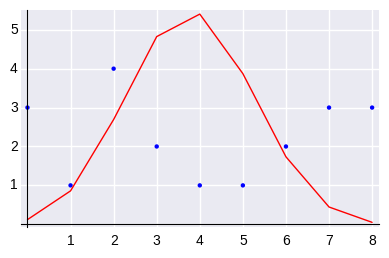

In [13]:
lst_plt = list_plot(tbl4_lst, zorder=2)
prd_plt = list_plot([_p(q, y, 8)*tbl4.sum() for y in (0..8)], plotjoined=True, rgbcolor="red")
(lst_plt + prd_plt).show(figsize=4)

In [14]:
# x = 4 の平均と分散を求める（平均に対して分散が大きいことが分かる）
d4 = d[d.x==4]
print d4.y.mean(), d4.y.var()

4.05 8.36578947368


In [15]:
# 二項分布から期待されている分散は２なので、8.4はかなり大きい
N = 8
vr = N*q*(1-q) 
print vr

1.99396217995198


<html>
	<h2>一般化線形混合分布（GLMM）を使った分析</h2>
	<p>
		個体差を考慮した分析手法として一般化線形混合分布（GLMM）が出てきます。
	</p>
	<p>
		ここでは、個体$i$の個体差を$r_i$とし、以下の様なリンク関数を定義します。
$$
		logit(q_i) = \beta_1 + \beta_2 x_i + r_i
$$		
	</p>
	<p>
		ここで$r_i$をどのような分布にするかですが、久保本では平均０，分散$s$の正規分布と
		しています。（統計モデルとして便利だからと理由です）
	</p>
	<p>
		glmmMLを使った分析では、個体毎に異なる独立パラメータをclusterオプションで指定します。
		ここでは、idが個体を識別する指標として使われています。
	</p>
</html>

In [16]:
#r("install.packages('glmmML')")
r('library(glmmML)')

 [1] "glmmML"    "jsonlite"  "ggplot2"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
 [9] "methods"   "base"     

In [17]:
# python版ではない、R一般線形混合モデルGLMMを使う
# 個体差は、平均０の分散sの正規分布に従うと仮定して先の問題を扱う
r('fit <- glmmML(cbind(y, N - y) ~ x, data = d, family = binomial, cluster = id)')


Call:  glmmML(formula = cbind(y, N - y) ~ x, family = binomial, data = d,      cluster = id) 


              coef se(coef)      z Pr(>|z|)
(Intercept) -4.190   0.8777 -4.774 1.81e-06
x            1.005   0.2075  4.843 1.28e-06

Scale parameter in mixing distribution:  2.408 gaussian 
Std. Error:                              0.2202 

        LR p-value for H_0: sigma = 0:  2.136e-55 

Residual deviance: 269.4 on 97 degrees of freedom 	AIC: 275.4 

<html>
	<h3>結果の可視化</h3>
	<p>
		GLMとの違いは、分析結果から予測される二項分布を見ると明らかです。
		GLMのようなfitted.valuesがGLMMにはないので、分析結果の二項分布をmyfuncで定義して、
		stat_function使ってプロットしてみました。
	</p>
	<p>
		きれいに二項分布が表示されました。（これが図7.10の(A)）
	</p>
</html>

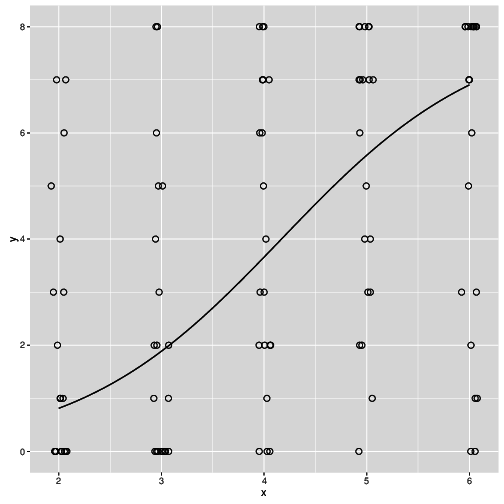

In [18]:
# 結果からロジスティック関数をmyfunc <- 1/(1 + exp(-(-4.190 + 1.005*z))*Nで定義
r('myfunc <- function(z) { 8*(1/(1 + exp(-(-4.190 + 1.005*z))))}')
# 結果をプロット
graph = preGraph("images/fig7.10-R.pdf")
r('p <- ggplot(d, aes(x=x, y=y) )+ geom_point(position=position_jitter(width=.2, height=0), shape=21, size=2.5) + stat_function(fun=myfunc)')
r('plot(p)')
postGraph(graph)

<html>
	<h3>$r_i$の分布</h3>
	<p>
		もう一つGLMMから求められた$r_i$の正規分布をプロットすると以下の様になります。
		-10, 10ではほぼ０になっています。
	</p>
</html>

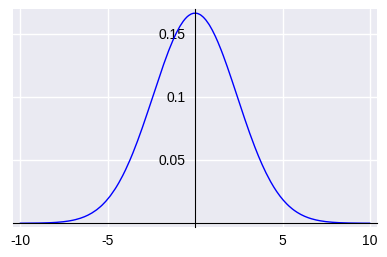

In [19]:
# σ=2.4の正規分布
T = RealDistribution('gaussian', 2.4, seed=100)
plot(lambda x : T.distribution_function(x), [x, -10, 10], figsize=4)

<html>
	<h3>GLMMから求められた尤度</h3>
	<p>
		個体毎の尤度$L_i$は、以下の様に$r_i$を積分して求めることができます。
$$
		L_i = \int_{-\infty}^{\infty} p(y_i | \beta_1, \beta_2, r_i) p(r_i | s) dr_i
$$		
	</p>
	<p>
		GLMMの結果からqを求める関数_qを定義し、上記の積分をSageの数値積分を使って計算する関数_Liを以下の様に
		作りました。rの積分範囲は、sの分布から-10から10としました。
	</p>
	<p>
		チェックのために、久保本図7.8にあるx=4, r={-2.20, -0.60, 1.00, 2.60}のqの値と、
		y={0, 4, 7}の尤度$L_i$を出力してみました。
	</p>
	<p>
		最後に、Liに20（個体数）を掛けた分布をx=4のヒストグラムに重ね合わせてみました。
		きれいに、図7.10(B)の通り、生存種子数を表現できているのが分かります。
	</p>
	<p>
		このような積分を含む処理でも数式処理システムSageを使えば簡単に分析できるのが、
		ご理解頂けたと思います。
	</p>
</html>

In [20]:
# 回帰分析の結果からqを求める
def _q(x, r):
    return _logistic(-4.190 + 1.005*x + r)
# 指定されたyの尤度を求める(上記分布から積分範囲は-10から10とした)
def _Li(y):
    return numerical_integral(lambda r: _p(_q(4, r), y, 8)*T.distribution_function(r), -10, 10)[0]

In [21]:
_q(4, -2.2), _q(4, -0.6), _q(4, 1.0), _q(4, 2.6)

(0.0854891394348065, 0.316479106263684, 0.696354929823834, 0.919086532784535)

In [22]:
_Li(0), _Li(4), _Li(7)

(0.18814448426796998, 0.07913801041038665, 0.10840844640974827)

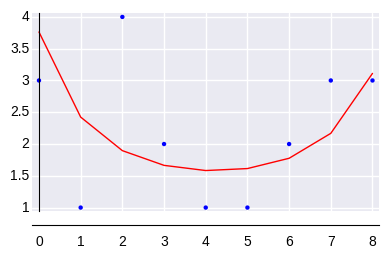

In [23]:
prd2_plt = list_plot([_Li(x)*20 for x in range(9)], plotjoined=True, rgbcolor="red")
(lst_plt + prd2_plt).show(figsize=4)